In [1]:
import json
import requests
import datetime
import base64

In [2]:
from config import client_id
from config import client_secret

In [3]:
import pandas as pd 
import scipy.stats as stats

In [4]:
from urllib.parse import urlencode

In [5]:
from matplotlib import pyplot as plt
import numpy as np

In [6]:
csv_path = "../Resources/top_songs_of_2010_decade.csv"

In [7]:
decade_df = pd.read_csv(csv_path, encoding = 'cp1252')

In [8]:
del decade_df["Unnamed: 0"]
decade_df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [20]:
group_by_year = decade_df.groupby(["year"])

In [21]:
year_count = group_by_year["year"].count()
year_count

year
2010    51
2011    53
2012    35
2013    71
2014    58
2015    95
2016    80
2017    65
2018    64
2019    31
Name: year, dtype: int64

# dnce - Danceability Over time

**danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

In [66]:
avg_danceability_by_year = group_by_year["dnce"].mean()

In [67]:
danceability_df = pd.DataFrame({"#Songs" : year_count, "Avg. Danceability" : avg_danceability_by_year})
danceability_df

,#Songs,Avg. Danceability
year,,
2010,51,64.529412
2011,53,63.641509
2012,35,65.714286
2013,71,62.042254
2014,58,62.534483
2015,95,63.663158
2016,80,63.325000
2017,65,65.369231
2018,64,67.203125


In [68]:
danceability_df["Year"] = danceability_df.index
danceability_df

,#Songs,Avg. Danceability,Year
year,,,
2010,51,64.529412,2010
2011,53,63.641509,2011
2012,35,65.714286,2012
2013,71,62.042254,2013
2014,58,62.534483,2014
2015,95,63.663158,2015
2016,80,63.325000,2016
2017,65,65.369231,2017
2018,64,67.203125,2018


In [69]:
x_axis = danceability_df.index
y_axis = danceability_df["Avg. Danceability"]

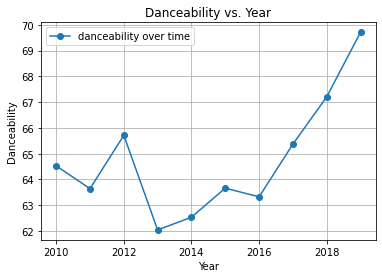

In [70]:
plt.plot(x_axis, y_axis, marker = "o", label = "danceability over time")

plt.xlabel("Year")
plt.ylabel("Danceability")
plt.title("Danceability vs. Year")

plt.legend(loc = "upper left")
plt.grid()

plt.savefig('../Output Data/danceability_scatter_plot.png', dpi = 72, bbox_inches = 'tight')
plt.show()

<AxesSubplot:title={'center':'dnce'}, xlabel='year'>

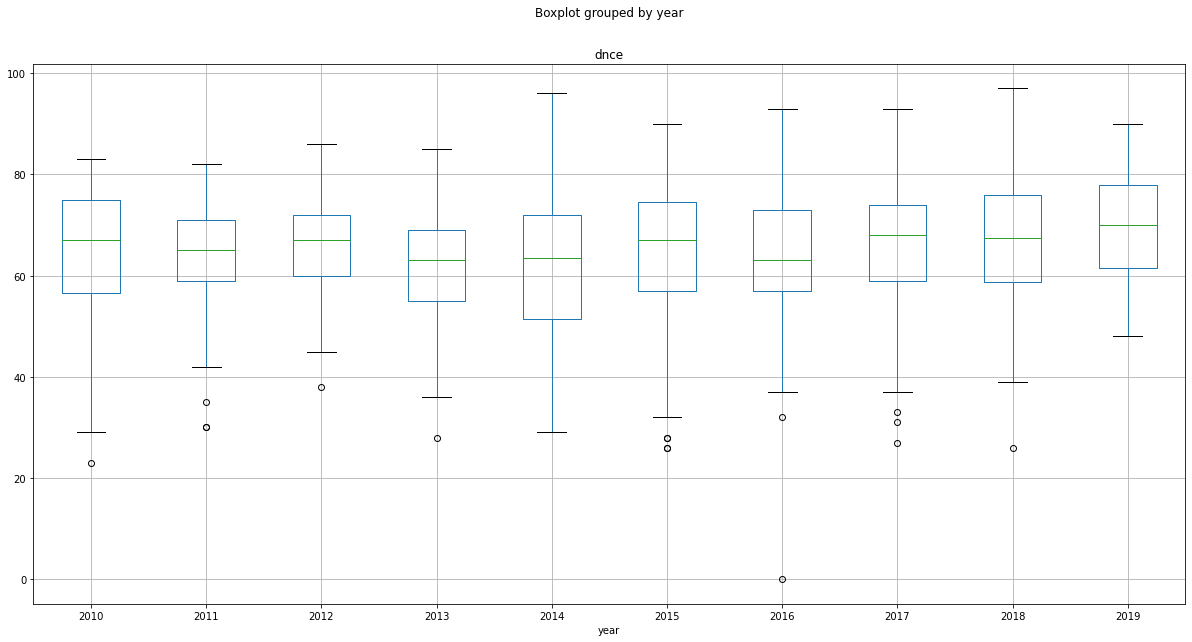

In [71]:
decade_df.boxplot("dnce", by = "year", figsize=(20, 10))

In [72]:
year10 = decade_df[decade_df["year"] == 2010]["dnce"]
year11 = decade_df[decade_df["year"] == 2011]["dnce"]
year12 = decade_df[decade_df["year"] == 2012]["dnce"]
year13 = decade_df[decade_df["year"] == 2013]["dnce"]
year14 = decade_df[decade_df["year"] == 2014]["dnce"]
year15 = decade_df[decade_df["year"] == 2015]["dnce"]
year16 = decade_df[decade_df["year"] == 2016]["dnce"]
year17 = decade_df[decade_df["year"] == 2017]["dnce"]
year18 = decade_df[decade_df["year"] == 2018]["dnce"]
year19 = decade_df[decade_df["year"] == 2019]["dnce"]

In [73]:
stats.f_oneway(year10, year11, year12, year13, year14, year15, year16, year17, year18, year19)

F_onewayResult(statistic=1.41796817839109, pvalue=0.17662787819215314)

## Statistical Analysis on Danceability of Songs over the 2010 Decade

We want to know: Did danceability of music constantly increase over the 2010 decade?

**Alternative Hypothesis:** If danceability does constantly increase over the decade, then every year the danceability of music will be greater than the year before.

**Null Hypothesis:** If danceability does not constantly increase over the decade, then every year the danceability of music will not be greater than the year before.

The p-value for danceability over the decade is 0.177. Because the p-value is greater than 0.05, we can conclude that the change in danceability over the decade is not statistically significant and indicated strong evidence for the null hypothesis. Therefore, we fail to reject the **null hypothesis.**

# dB - LOUDNESS Over time

**loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

In [32]:
avg_dB_by_year = group_by_year["dB"].mean()

In [33]:
db_df = pd.DataFrame({"#Songs" : year_count, "Avg. dB" : avg_dB_by_year})
db_df

,#Songs,Avg. dB
year,,
2010,51,-4.901961
2011,53,-5.018868
2012,35,-4.857143
2013,71,-5.140845
2014,58,-5.775862
2015,95,-5.621053
2016,80,-6.712500
2017,65,-5.615385
2018,64,-5.671875


In [36]:
db_df["Year"] = db_df.index
db_df

,#Songs,Avg. dB,Year
year,,,
2010,51,-4.901961,2010
2011,53,-5.018868,2011
2012,35,-4.857143,2012
2013,71,-5.140845,2013
2014,58,-5.775862,2014
2015,95,-5.621053,2015
2016,80,-6.712500,2016
2017,65,-5.615385,2017
2018,64,-5.671875,2018


In [37]:
x_axis = db_df.index
y_axis = db_df["Avg. dB"]

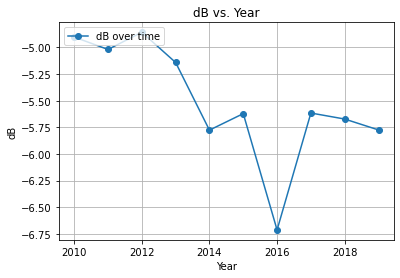

In [38]:
plt.plot(x_axis, y_axis, marker = "o", label = "dB over time")

plt.xlabel("Year")
plt.ylabel("dB")
plt.title("dB vs. Year")

plt.legend(loc = "upper left")
plt.grid()

plt.savefig('../Output Data/dB_scatter_plot.png', dpi = 72, bbox_inches = 'tight')
plt.show()

<AxesSubplot:title={'center':'dB'}, xlabel='year'>

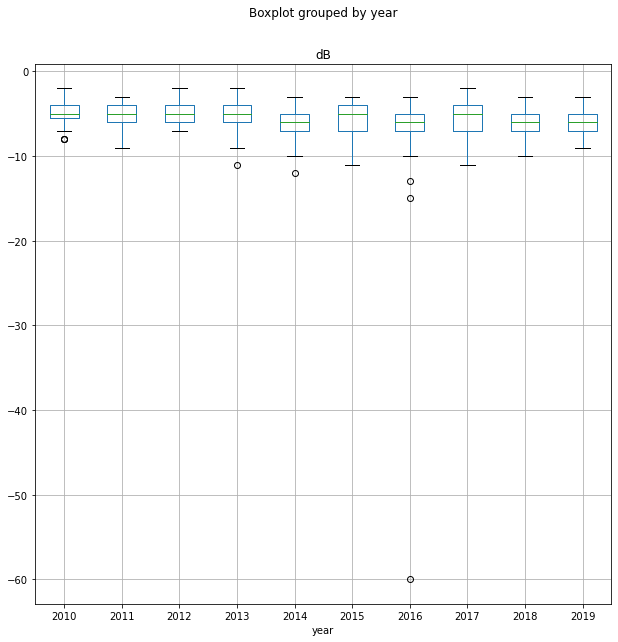

In [43]:
decade_df.boxplot("dB", by = "year", figsize=(10, 10))

In [44]:
year10 = decade_df[decade_df["year"] == 2010]["dB"]
year11 = decade_df[decade_df["year"] == 2011]["dB"]
year12 = decade_df[decade_df["year"] == 2012]["dB"]
year13 = decade_df[decade_df["year"] == 2013]["dB"]
year14 = decade_df[decade_df["year"] == 2014]["dB"]
year15 = decade_df[decade_df["year"] == 2015]["dB"]
year16 = decade_df[decade_df["year"] == 2016]["dB"]
year17 = decade_df[decade_df["year"] == 2017]["dB"]
year18 = decade_df[decade_df["year"] == 2018]["dB"]
year19 = decade_df[decade_df["year"] == 2019]["dB"]

In [45]:
stats.f_oneway(year10, year11, year12, year13, year14, year15, year16, year17, year18, year19)

F_onewayResult(statistic=2.599670978621324, pvalue=0.006014637427076882)

## Statistical Analysis on LOUDNESS of Songs over the 2010 Decade

We want to know: Did dB (loudness) of music constantly increase over the 2010 decade? 

**Alternative Hypothesis**: If dB does constantly increase over the decade, then every year the dB of music will be greater than the year before. 

**Null Hypothesis**: If dB does not constantly increase over the decade, then every year the dB of music will not be greater than the year before. 

The p-value for dB over the decade is 0.006. Because the p-value is NOT greater than 0.05, we can conclude that the change in dB over the decade is statistically significant and indicated strong evidence for the **hypothesis**. Therefore, we reject the null hypothesis. 

# bpm - TEMPO Over time

**tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

In [47]:
avg_bpm_by_year = group_by_year["bpm"].mean()

In [50]:
bpm_df = pd.DataFrame({"#Songs" : year_count, "Avg. bpm" : avg_bpm_by_year})
bpm_df

,#Songs,Avg. bpm
year,,
2010,51,122.058824
2011,53,119.075472
2012,35,121.085714
2013,71,121.676056
2014,58,123.000000
2015,95,119.768421
2016,80,114.325000
2017,65,116.800000
2018,64,114.593750


In [51]:
bpm_df["Year"] = bpm_df.index
bpm_df

,#Songs,Avg. bpm,Year
year,,,
2010,51,122.058824,2010
2011,53,119.075472,2011
2012,35,121.085714,2012
2013,71,121.676056,2013
2014,58,123.000000,2014
2015,95,119.768421,2015
2016,80,114.325000,2016
2017,65,116.800000,2017
2018,64,114.593750,2018


In [52]:
x_axis = bpm_df.index
y_axis = bpm_df["Avg. bpm"]

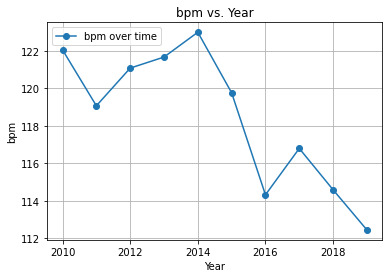

In [53]:
plt.plot(x_axis, y_axis, marker = "o", label = "bpm over time")

plt.xlabel("Year")
plt.ylabel("bpm")
plt.title("bpm vs. Year")

plt.legend(loc = "upper left")
plt.grid()

plt.savefig('../Output Data/bpm_scatter_plot.png', dpi = 72, bbox_inches = 'tight')
plt.show()

<AxesSubplot:title={'center':'bpm'}, xlabel='year'>

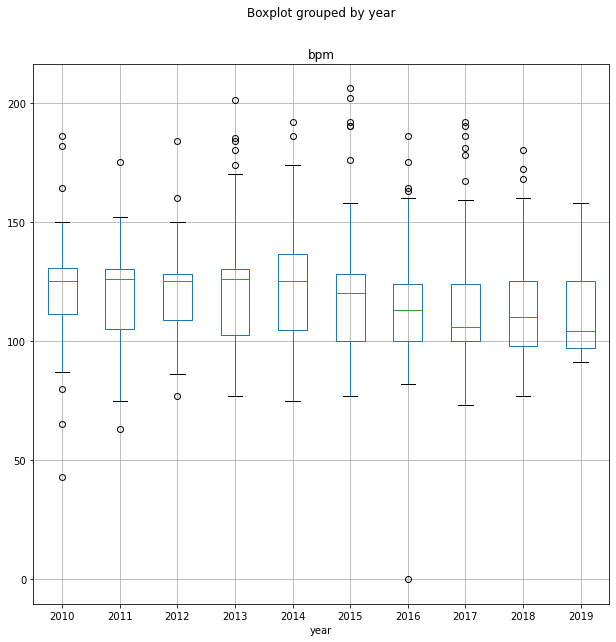

In [54]:
decade_df.boxplot("bpm", by = "year", figsize=(10, 10))

In [55]:
year10 = decade_df[decade_df["year"] == 2010]["bpm"]
year11 = decade_df[decade_df["year"] == 2011]["bpm"]
year12 = decade_df[decade_df["year"] == 2012]["bpm"]
year13 = decade_df[decade_df["year"] == 2013]["bpm"]
year14 = decade_df[decade_df["year"] == 2014]["bpm"]
year15 = decade_df[decade_df["year"] == 2015]["bpm"]
year16 = decade_df[decade_df["year"] == 2016]["bpm"]
year17 = decade_df[decade_df["year"] == 2017]["bpm"]
year18 = decade_df[decade_df["year"] == 2018]["bpm"]
year19 = decade_df[decade_df["year"] == 2019]["bpm"]

In [56]:
stats.f_oneway(year10, year11, year12, year13, year14, year15, year16, year17, year18, year19)

F_onewayResult(statistic=1.202318335542012, pvalue=0.29063334958028647)

## Statistical Analysis on TEMPO of Songs over the 2010 Decade

We want to know: Did bpm (tempo) of music constantly increase over the 2010 decade? 

**Alternative Hypothesis**: If bpm does constantly increase over the decade, then every year the bpm of music will be greater than the year before. 

**Null Hypothesis**: If bpm does not constantly increase over the decade, then every year the bpm of music will not be greater than the year before. 

The p-value for bpm over the decade is 0.29. Because the p-value is greater than 0.05, we can conclude that the change in bpm over the decade is not statistically significant and indicated strong evidence for the **null-hypothesis**. Therefore, we fail to reject the null hypothesis. 

# val - VALENCE Over time

**valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [57]:
avg_dB_by_year = group_by_year["val"].mean()

In [58]:
val_df = pd.DataFrame({"#Songs" : year_count, "Avg. val" : avg_dB_by_year})
val_df

,#Songs,Avg. val
year,,
2010,51,57.000000
2011,53,53.698113
2012,35,64.171429
2013,71,53.183099
2014,58,52.086207
2015,95,52.526316
2016,80,45.150000
2017,65,52.276923
2018,64,48.765625


In [59]:
val_df["Year"] = val_df.index
val_df

,#Songs,Avg. val,Year
year,,,
2010,51,57.000000,2010
2011,53,53.698113,2011
2012,35,64.171429,2012
2013,71,53.183099,2013
2014,58,52.086207,2014
2015,95,52.526316,2015
2016,80,45.150000,2016
2017,65,52.276923,2017
2018,64,48.765625,2018


In [61]:
x_axis = val_df.index
y_axis = val_df["Avg. val"]

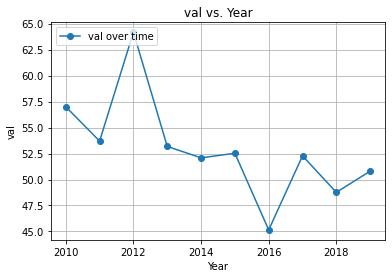

In [62]:
plt.plot(x_axis, y_axis, marker = "o", label = "val over time")

plt.xlabel("Year")
plt.ylabel("val")
plt.title("val vs. Year")

plt.legend(loc = "upper left")
plt.grid()

plt.savefig('../Output Data/val_scatter_plot.png', dpi = 72, bbox_inches = 'tight')
plt.show()

<AxesSubplot:title={'center':'val'}, xlabel='year'>

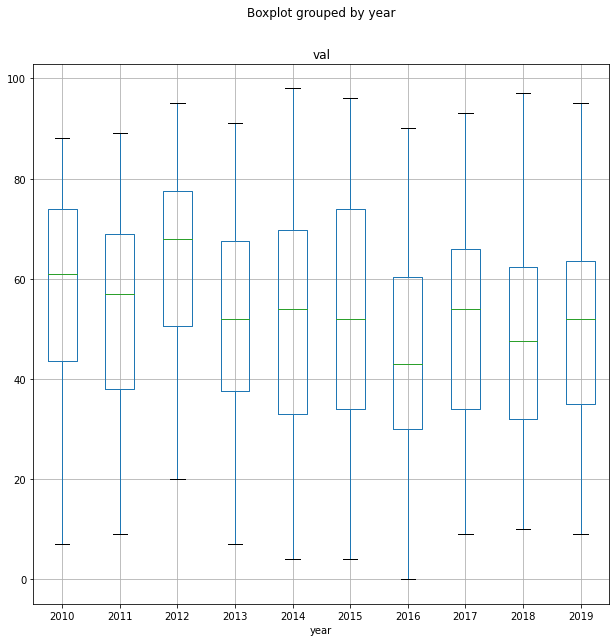

In [63]:
decade_df.boxplot("val", by = "year", figsize=(10, 10))

In [64]:
year10 = decade_df[decade_df["year"] == 2010]["val"]
year11 = decade_df[decade_df["year"] == 2011]["val"]
year12 = decade_df[decade_df["year"] == 2012]["val"]
year13 = decade_df[decade_df["year"] == 2013]["val"]
year14 = decade_df[decade_df["year"] == 2014]["val"]
year15 = decade_df[decade_df["year"] == 2015]["val"]
year16 = decade_df[decade_df["year"] == 2016]["val"]
year17 = decade_df[decade_df["year"] == 2017]["val"]
year18 = decade_df[decade_df["year"] == 2018]["val"]
year19 = decade_df[decade_df["year"] == 2019]["val"]

In [65]:
stats.f_oneway(year10, year11, year12, year13, year14, year15, year16, year17, year18, year19)

F_onewayResult(statistic=2.5063020852681133, pvalue=0.008066328573572985)

## Statistical Analysis on VALENCE of Songs over the 2010 Decade

We want to know: Did valence of music constantly increase over the 2010 decade? 

**Alternative Hypothesis**: If valence does constantly increase over the decade, then every year the valence of music will be greater than the year before. 

**Null Hypothesis**: If valence does not constantly increase over the decade, then every year the dB of music will not be greater than the year before. 

The p-value for valence over the decade is 0.008. Because the p-value is NOT greater than 0.05, we can conclude that the change in dB over the decade is statistically significant and indicated strong evidence for the **hypothesis**. Therefore, we reject the null hypothesis. 